# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [0]:
!pip install kaggle

In [0]:
!pwd


/content


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"aakash30495","key":"5c69e78b676cd6bcf01b54724975bf96"}'}

In [0]:
!mkdir ~/.kaggle
!cp `pwd`/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

#!mkdir /content/.kaggle
    #####!cp /root/shared/Downloads/kaggle.json ~/.kaggle
#!chmod 600 ~/.kaggle/kaggle.json
#!mv `pwd`/kaggle.json `pwd`/.kaggle
#!ls -atr
#!ls -atr `pwd`/.kaggle
#!chmod 600 `pwd`/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![alt](home_credit.png "Home credit")

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [0]:
!pwd
#DATA_DIR = "/content"
DATA_DIR = "/content/Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir -p $DATA_DIR

/content


In [0]:
!ls -l $DATA_DIR

total 705172
-rw-r--r-- 1 root root   6091687 May  1 18:56 application_test.csv.zip
-rw-r--r-- 1 root root  37847529 May  1 18:56 application_train.csv.zip
-rw-r--r-- 1 root root  59574401 May  1 18:56 bureau_balance.csv.zip
-rw-r--r-- 1 root root  38550359 May  1 18:56 bureau.csv.zip
-rw-r--r-- 1 root root 101435187 May  1 18:56 credit_card_balance.csv.zip
-rw-r--r-- 1 root root     37383 May  1 18:56 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 284147164 May  1 18:56 installments_payments.csv.zip
-rw-r--r-- 1 root root 113882235 May  1 18:56 POS_CASH_balance.csv.zip
-rw-r--r-- 1 root root  79962533 May  1 18:56 previous_application.csv.zip
-rw-r--r-- 1 root root    536202 May  1 18:56 sample_submission.csv


In [0]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

application_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
installments_payments.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
POS_CASH_balance.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
credit_card_balance.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
HomeCredit_columns_description.csv: Skipping, found more recently modified local copy (use --force to force download)
bureau.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
application_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
bureau_balance.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
previous_application.csv

### Imports

In [0]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [0]:
unzippingReq = True
if unzippingReq==True: #please modify this code 
    !cd $DATA_DIR
    zip_ref = zipfile.ZipFile(DATA_DIR+'/application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile(DATA_DIR+'/previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

![image.png](attachment:image.png)

### Application train

In [0]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

DATA_DIR="/content/datasets"
#DATA_DIR="/Users/ashokkuppuraj/Documents/IndianaUniv/2020-Spring/AppliedML/project/data"
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [0]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [73]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 36.3 s, sys: 5.26 s, total: 41.6 s
Wall time: 1min 22s


In [0]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train/test

In [0]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [0]:
# Describe numerical features of train
datasets["application_train"].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [0]:
 # Describe numerical features of test
datasets["application_test"].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,...,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,...,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,...,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,

In [0]:
#look at all categorical and numerical
datasets["application_train"].describe(include='all') 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,Panel,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73830,150503,NaN,66040,159428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,...,0.101954,0.108607,0.008651,0.028236,NaN,NaN,0.

In [0]:
# checking the datatypes of all features
datasets["application_train"].dtypes.value_counts() 

float64    65
int64      41
object     16
dtype: int64

In [0]:
# Number of categories in each categorical variable
datasets["application_train"].select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Missing data for application train

In [0]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(10)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MEDI,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199


In [0]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(10)

,Percent,Test Missing Count
COMMONAREA_MEDI,68.72,33495
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
NONLIVINGAPARTMENTS_AVG,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780


## Distribution of the target column 

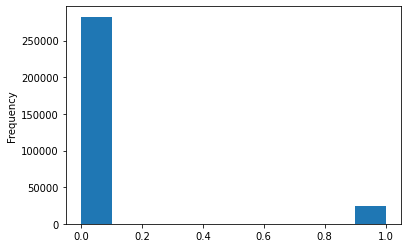

In [0]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

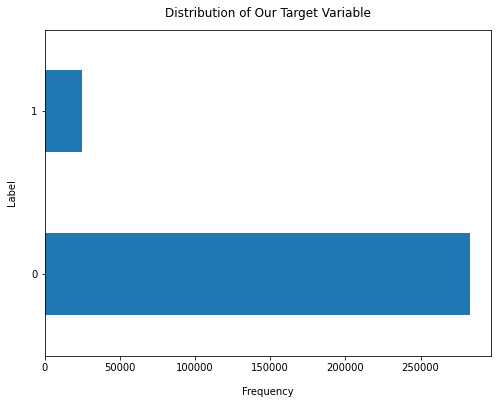

In [0]:
#An alternative Representation
datasets["application_train"]['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Frequency", labelpad=14)
plt.ylabel("Label", labelpad=14)
plt.title("Distribution of Our Target Variable", y=1.02);

Shows How imbalanced our target variable is


## Correlation with  the target column 

In [0]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


### Top 5 positive correlated features: DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, DAYS_BIRTH





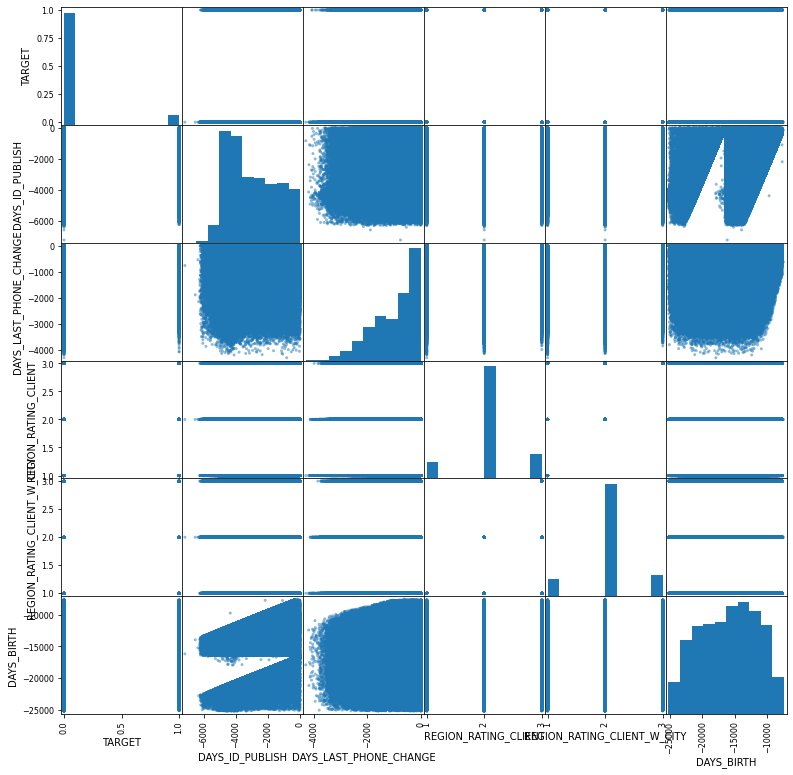

In [0]:
from pandas.plotting import scatter_matrix

data = datasets["application_train"]
# Top four correlated inputs with survived
attributes = ['TARGET', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']
scatter_matrix(data[attributes], figsize=(13, 13));

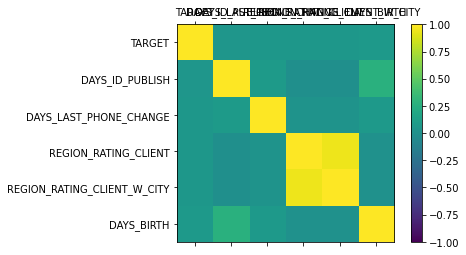

In [0]:
attributes1 = ['TARGET', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']
import numpy as np
correlations = data[attributes1].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(attributes1)
ax.set_yticklabels(attributes1)
plt.show()

### Top 5 negative correlated features

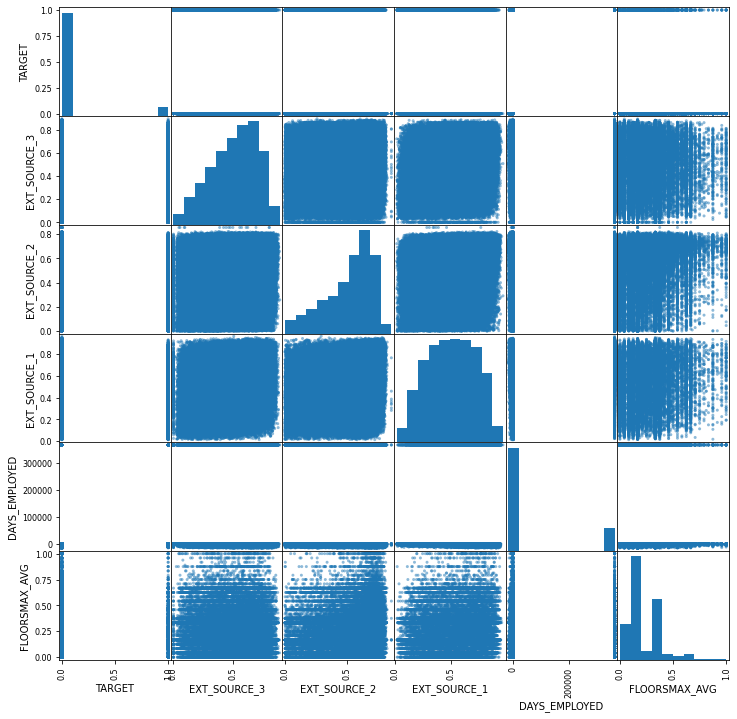

In [0]:
from pandas.plotting import scatter_matrix

data = datasets["application_train"]
# Top four correlated inputs with survived
attributes = ['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG']
scatter_matrix(data[attributes], figsize=(12, 12));

## Exploring data

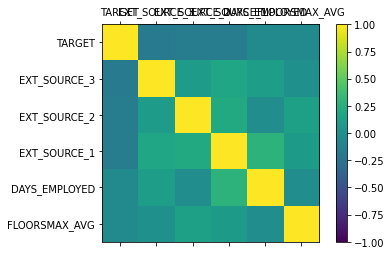

In [0]:
attributes2 = ['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG']
import numpy as np
correlations = data[attributes2].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(attributes2)
ax.set_yticklabels(attributes2)
plt.show()

### Applicants Age 

#### All applicants Age

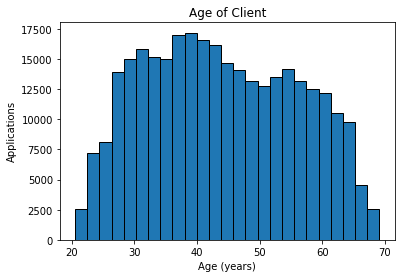

In [0]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.ylabel('Applications')
plt.title('Age of Client'); plt.xlabel('Age (years)');

#### Defaulter's age

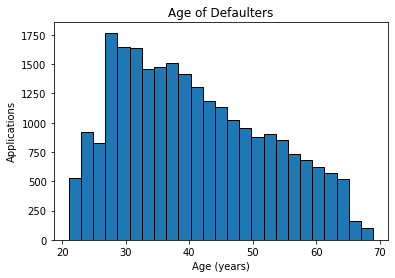

In [0]:
data = datasets["application_train"]
data1 = data[data['TARGET'] == 1]

plt.hist(data1['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.ylabel('Applications')
plt.title('Age of Defaulters'); plt.xlabel('Age (years)');

# We can say that 28-45 age group comprise the most of the defaulters

### Applicants occupations

#### All applicants

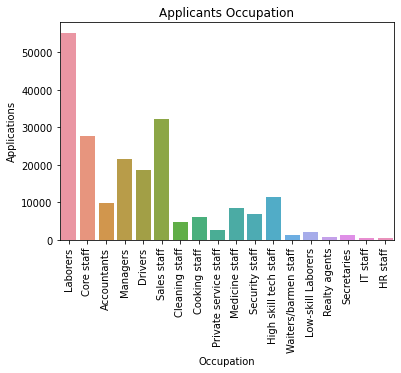

In [0]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xlabel('Occupation')
plt.ylabel('Applications')
plt.xticks(rotation=90);

#### Defaulter's occupation

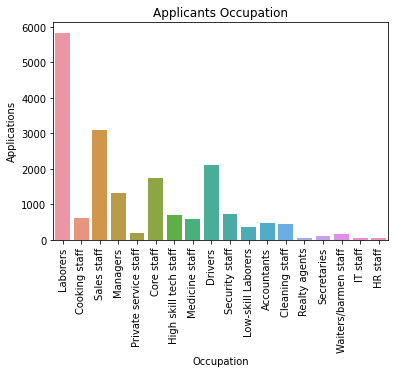

In [0]:
sns.countplot(x='OCCUPATION_TYPE', data=data1);
plt.title('Applicants Occupation');
plt.xlabel('Occupation')
plt.ylabel('Applications')
plt.xticks(rotation=90);

### Applicants gender

#### All applicants

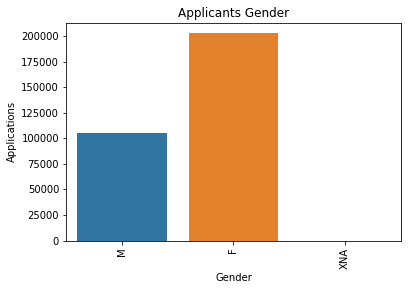

In [0]:
sns.countplot(x='CODE_GENDER', data=datasets["application_train"]);
plt.title('Applicants Gender');
plt.xlabel('Gender')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# Here we see that there is an extra category called XNA - since it is very low
# with only 

#### Defaulters by Gender

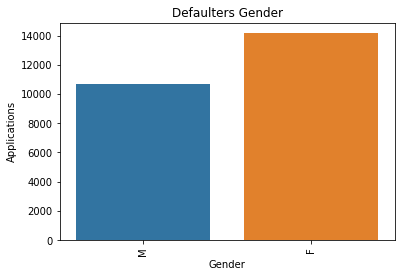

In [0]:
sns.countplot(x='CODE_GENDER', data=data1);
plt.title('Defaulters Gender');
plt.xlabel('Gender')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# Here we see that the number of defaulters male and female are almost same - 11k men and 14k women
# which is not as extreme as the difference in number of applications between male and female

### What is the education level of defaulters?

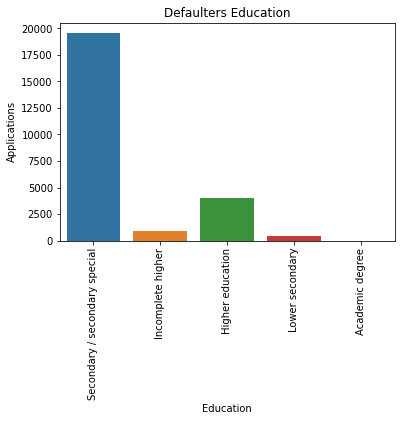

In [0]:
sns.countplot(x='NAME_EDUCATION_TYPE', data=data1);
plt.xlabel('Education')
plt.ylabel('Applications')
plt.title('Defaulters Education');
plt.xticks(rotation=90);



### What is the marital status of defaulters?

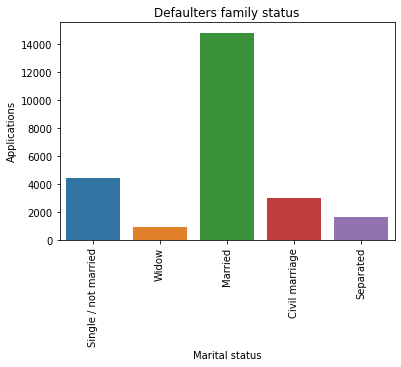

In [0]:
sns.countplot(x='NAME_FAMILY_STATUS', data=data1);
plt.title('Defaulters family status');
plt.xlabel('Marital status')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# As we can see married people make the most of the defaulters, as we can logically say 
# that with marriage comes more responsibilities and ofcourse more expenses follow 

### What kind of Housing do defaulters have?

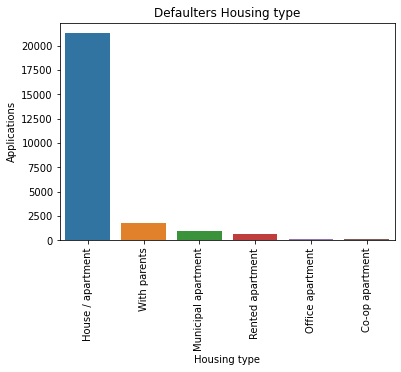

In [0]:
sns.countplot(x='NAME_HOUSING_TYPE', data=data1);
plt.xlabel('Housing type')
plt.ylabel('Applications')
plt.title('Defaulters Housing type');
plt.xticks(rotation=90);

### Do defaulters have many children?

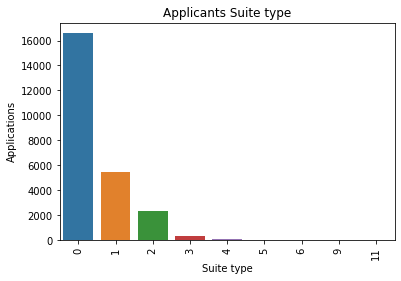

In [0]:

sns.countplot(x='CNT_CHILDREN', data=data1);
plt.xlabel('Suite type')
plt.ylabel('Applications')
plt.title('Applicants Suite type');
plt.xticks(rotation=90);


### Do defaulters own a car or a real estate?

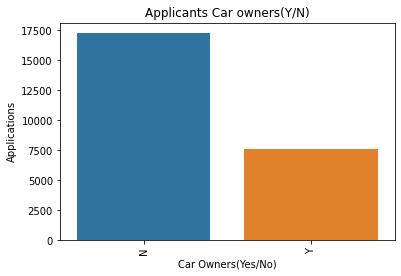

In [0]:
sns.countplot(x='FLAG_OWN_CAR', data=data1);
plt.xlabel('Car Owners(Yes/No)')
plt.ylabel('Applications')
plt.title('Applicants Car owners(Y/N)');
plt.xticks(rotation=90);

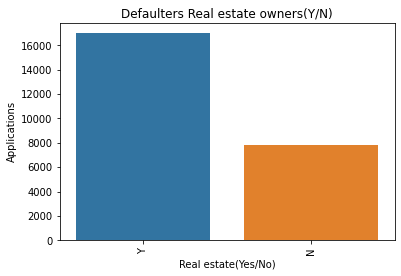

In [0]:
# Real estate owners or not?

sns.countplot(x='FLAG_OWN_REALTY', data=data1);
plt.xlabel('Real estate(Yes/No)')
plt.ylabel('Applications')
plt.title('Defaulters Real estate owners(Y/N)');
plt.xticks(rotation=90);

## INFERENCE ##
# we can see that many defaulters are real estate owners and cant repay loan
# due to risky real estate deals

# Feature Engineering

## Dealing with missing values

In [0]:
df1_train = datasets["application_train"].loc[:, datasets["application_train"].isnull().mean() <= .3]
print(df1_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [0]:
#print (datasets["application_train"].isnull().mean() * 100)


(307511, 72)

In [0]:
# creating new dataframe variables for analysis
identifiedCols=df1_train.columns.values.tolist()
identifiedCols.remove('TARGET')
print(identifiedCols)
df1_test =  datasets['application_test'][identifiedCols]
print(df1_test.shape)
#df1_test.shape



['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMEN

In [0]:
df1_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [0]:
#All selected columns 
############ NEEDED ?????? ###########
#Describing the numerical variables of our dataset in terms of unique values
pd.set_option('display.max_rows', 150)
df1_train.apply(pd.Series.nunique, axis = 0)
print("Type - float64")
df1_train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

Type - float64


AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
REGION_POPULATION_RELATIVE        81
DAYS_REGISTRATION              15688
CNT_FAM_MEMBERS                   17
EXT_SOURCE_2                  119831
EXT_SOURCE_3                     814
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
OBS_60_CNT_SOCIAL_CIRCLE          33
DEF_60_CNT_SOCIAL_CIRCLE           9
DAYS_LAST_PHONE_CHANGE          3773
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
dtype: int64

In [0]:
correlations = df1_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE                   -0.023806
AMT_ANNUITY                  -0.012817
Name: TARGET, dtype: float64


In [0]:
# categorical missing data - 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE'

cat_vars=df1_train.select_dtypes('object').isnull().sum()
cat_vars

NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64

In [0]:
# numerical missing data - No missing values in 'int64' type
df1_train.select_dtypes(np.number).isnull().sum()
#df1_train.select_dtypes('int64').isnull().sum()

SK_ID_CURR                         0
TARGET                             0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
L

In [0]:
# from observation we can say that-
# 1. AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE - we can drop the rows(2-10 missing values)

#Numerical Variables
# 2. AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, 
# AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR,
# EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,
# OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_GOODS_PRICE - All these variable we need to impute using mean or some other measure.


## Missing value imputations

 1. Here, we will be using standard imputation by using SimpleImputer function in impute library, this has been implementeds in the pipeline section.

 2. The strategy for imputing numerical features will be the mean 

 3. Lastly, the strategy for imputing categorical feature is the most frequent/ mode.


## Feature extraction

### Generic Feature Selection

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


def FeatureSelectionRF(data):
    # separating features and the target
    y = data['TARGET']
    x = data.drop('TARGET', 1)

    y1 = y.copy()
    x1 = x.copy()

    # imputing missing values
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    x1 = pd.DataFrame(imp.fit_transform(x1))

    # Standardizing the features
    x1 = StandardScaler().fit_transform(x1)


    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(x1, y1)
    selectedfeat= x.columns[(sel.get_support())]
    print(selectedfeat)
    print(len(selectedfeat))
    return selectedfeat
#Maybe Try PCA as well?

### Numerical - Using Random forest classifier


In [0]:
# Implementing Random Forest for selecting the best features

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Here we create a new column using AMT_CREDIT/AMT_INCOME_TOTAL-This will give the repayment capacity of a person
df1_train['AMT_INCOME'] = df1_train['AMT_CREDIT']/ df1_train['AMT_INCOME_TOTAL']

df1_test['AMT_INCOME'] = df1_test['AMT_CREDIT']/ df1_test['AMT_INCOME_TOTAL']

# getting list of numeric column names
features_numeric = df1_train.select_dtypes([np.number]).columns

print(len(features_numeric))
df = df1_train[features_numeric]

print(df.columns)



62
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCU

In [0]:
## Feature selection using Random forest
selected_Nfeat=FeatureSelectionRF(df)


Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME'],
      dtype='object')
19


### Categorical Clustering


In [0]:
## Combine values of NAME_INCOME_TYPE
df1_train['NAME_INCOME_TYPE']=df1_train['NAME_INCOME_TYPE'].replace(['State servant','Maternity leave'],'Working').replace(['Commercial associate'],'Businessman').replace(['Pensioner','Student'],'Unemployed')
df1_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'Businessman', 'Unemployed'], dtype=object)

In [0]:
## Combine values of NAME_INCOME_TYPE

print("Before change : ",df1_train['NAME_FAMILY_STATUS'].unique())
df1_train['NAME_FAMILY_STATUS']=df1_train['NAME_FAMILY_STATUS'].replace(['Civil marriage'],'Married').replace(['Widow','Separated'],'Single / not married')
print("After change : ",df1_train['NAME_FAMILY_STATUS'].unique())

Before change :  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
After change :  ['Single / not married' 'Married' 'Unknown']


In [0]:
#OCCUPATION_TYPE-Consider dropping during modelling
#Observation : No absolute correlation with the target, hence clustering based on the domain.
    #Green-collar worker
    #Grey-collar worker
    #Pink-collar worker
    #White-collar worker

#print("Before change : ",df1_train['OCCUPATION_TYPE'].unique())
#df1_train['OCCUPATION_TYPE']=df1_train['OCCUPATION_TYPE'].replace(['Managers','High skill tech staff','Secretaries','IT staff','HR staff'],'WhiteCollar').replace(['Medicine staff','Cooking staff','nan'],'GreenCollar').replace(['Accountants','Sales staff','Realty agents','Private service staff'],'GreyCollar').replace(['Laborers','Core staff','Drivers','Cleaning staff','Security staff','Waiters/barmen staff','Low-skill Laborers'],'BlueCollar')
#print("After change : ",df1_train['OCCUPATION_TYPE'].unique())

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

## Joining previous app file

In [0]:
appsDF = datasets["previous_application"]

In [0]:
appsDF.shape

(1670214, 37)

In [0]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [0]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [0]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
print(prevAppCounts)

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64


In [0]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

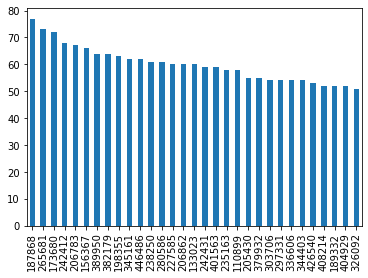

In [0]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
#plt.xticks(rotation=25)
plt.show()

In [0]:
# histogram 

sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

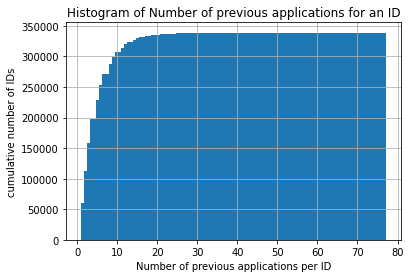

In [0]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')

In [0]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


In [0]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## Feature aggregators



In [0]:
appsDF = datasets['previous_application']

appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [0]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Pickle directory

In [0]:
### 
pickleTmpdir="/content/Data/pickleSpace"
#pickleTmpdir="/Users/ashokkuppuraj/Documents/IndianaUniv/2020-Spring/AppliedML/project/picklespace"
persistNeeded=True
### This DF is used to join other features:
joiningAppDf=datasets["application_train"][['SK_ID_CURR']]
joiningAppDfTest=datasets["application_test"][['SK_ID_CURR']]

### Feature aggregator

In [0]:
class featuresAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None,grpBy=None): # no *args or **kargs
        self.features = features
        self.grpByCol=grpBy
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = features[f]

    def fit(self, X, y=None):
        print("GroupBy Column : ",self.grpByCol)
        print("Features :",self.features)
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(self.grpByCol).agg(self.agg_op_features)
        result.columns = ["_".join(x) for x in result.columns.ravel()]
        return result
    

from sklearn.pipeline import make_pipeline 
def driver_FeaturesAggregater(df, features,grpByCol):
    test_pipeline = make_pipeline(featuresAggregater(features,grpByCol))
    return(test_pipeline.fit_transform(df))

### Handle cache using Pickle file

In [0]:

def pickleIt(indf,pklFilename):
    if persistNeeded:
        indf.to_pickle(pickleTmpdir+pklFilename)
    else:
        indf

def unPickleIt(df,pklFilename):
    if persistNeeded:
        out=pd.read_pickle(pickleTmpdir+pklFilename)
    else:
        out=df
    return out

### Impute feature

In [0]:
class featureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = features[f]

    def fit(self, X, y=None):
        print("Features :",self.features)
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.apply()
        result.columns = ["_".join(x) for x in result.columns.ravel()]
        return result
    

from sklearn.pipeline import make_pipeline 
def driver_FeaturesAggregater(df, features,grpByCol):
    test_pipeline = make_pipeline(featuresAggregater(features,grpByCol))
    return(test_pipeline.fit_transform(df))

## Feature extraction and join

### Aggregate Bureau and join Application

In [0]:


def Bureaujoin(BureauDf,BureauBalDf,AppSourceDf,pickleflnm):
  
  ### 1.1 Bureau Balance Agg
  groupByList=["SK_ID_BUREAU"]
  featureDict = {'MONTHS_BALANCE': ['min','max','mean'],'STATUS':['first']}
  bureauBalAggDf = driver_FeaturesAggregater(BureauBalDf,featureDict,groupByList)

  #print(sourceDf.head())
  #print(bureauBalAgg.head())

  ###1.2 Bureau Join Bureau_balance
  entireBureau=BureauDf.merge(bureauBalAggDf,on='SK_ID_BUREAU',how='left')

  ###1.3 Aggregate Bureau and Bureau_balance
  bureau=entireBureau
  ##Categorical feature conversions : 
  entireBureau['CREDIT_ACTIVE']=entireBureau['CREDIT_ACTIVE'].replace(['Active'],0).replace(['Bad debt'],1).replace(['Closed'],2).replace(['Sold'],3)

  num=entireBureau[[ 
        'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE','CREDIT_ACTIVE','DAYS_CREDIT_ENDDATE',
        'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
        'AMT_CREDIT_SUM_OVERDUE',  'DAYS_CREDIT_UPDATE',
        'AMT_ANNUITY', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
        'MONTHS_BALANCE_mean']]
  num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='mean')),
      ])


  entireBureaunumdf = pd.DataFrame(data=num_pipeline.fit_transform(num),columns=[ 
        'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE','CREDIT_ACTIVE', 'DAYS_CREDIT_ENDDATE',
        'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
        'AMT_CREDIT_SUM_OVERDUE',  'DAYS_CREDIT_UPDATE',
        'AMT_ANNUITY', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
        'MONTHS_BALANCE_mean'])

  entireBureauClean=pd.concat([entireBureau[['SK_ID_CURR','SK_ID_BUREAU']],entireBureaunumdf],axis=1)

  groupByList=["SK_ID_CURR"]
  featureDict = {'SK_ID_BUREAU': ['count'],'DAYS_CREDIT':['mean'],'CREDIT_DAY_OVERDUE':['mean']
  ,'CREDIT_ACTIVE':['mean']
  ,'DAYS_CREDIT_ENDDATE':['mean']
  ,'DAYS_ENDDATE_FACT':['mean']
  ,'AMT_CREDIT_MAX_OVERDUE':['mean']
  ,'CNT_CREDIT_PROLONG':['mean']
  ,'AMT_CREDIT_SUM':['mean']
  ,'AMT_CREDIT_SUM_DEBT':['mean']
  ,'AMT_CREDIT_SUM_LIMIT':['mean']
  ,'AMT_CREDIT_SUM_OVERDUE':['mean']
  ,'DAYS_CREDIT_UPDATE':['mean']
  ,'AMT_ANNUITY':['mean']
  ,'MONTHS_BALANCE_min':['mean']
  ,'MONTHS_BALANCE_max':['mean']
  ,'MONTHS_BALANCE_mean':['mean']}

  entireBureauAgg = driver_FeaturesAggregater(entireBureauClean,featureDict,groupByList)
  #print(entireBureauAgg[0:2])

  ### 1.4  Bureau join Application(Step1.pkl)

  #bureauBalAgg=
  step1Out=AppSourceDf.merge(entireBureauAgg,on='SK_ID_CURR',how='inner')

  #step1.count()
  pickleIt(step1Out,pickleflnm)
  return step1Out

### Joining POS_CASH_balance with Applications train

In [0]:
def PosCashJoin(PosCashDf,AppSourceDf,pickleflnm):
  groupByList=["SK_ID_CURR"]
  featureDict = { 'MONTHS_BALANCE': ['min','max','mean'],'NAME_CONTRACT_STATUS':['count'], 'CNT_INSTALMENT' : ['min','max','mean'], 'CNT_INSTALMENT_FUTURE': ['min','max','mean']}
  posBal_Agg = driver_FeaturesAggregater(PosCashDf, featureDict, groupByList)

  #print(posBal_Agg.head())
  # pos_cash_balance join application train #### STEP-5 ####
  step2 = AppSourceDf.merge(posBal_Agg,on='SK_ID_CURR',how='inner')
  #step1.count()
  pickleIt(step2,pickleflnm)
  return step2

### Aggregate Installement  and App Join (Step3)

In [0]:
def InstallCashJoin(InstallCashDf,AppSourceDf,pickleflnm):
  groupByListApp=["SK_ID_CURR"]
  #groupByListPrevApp=["SK_ID_PREV"]
  featureDict = {'DAYS_INSTALMENT': ['sum'],'DAYS_ENTRY_PAYMENT':['sum'],'AMT_INSTALMENT':['sum'],'AMT_PAYMENT':['sum']}
  #sourceDf=datasets['installments_payments']

  installmentAgg_CurrApp = driver_FeaturesAggregater(InstallCashDf,featureDict,groupByListApp)
  #installmentAgg_PrevApp = driver_FeaturesAggregater(sourceDf,featureDict,groupByListPrevApp)
  #print(sourceDf.head())
  #print(installmentAgg_CurrApp.head())
  #print(installmentAgg_PrevApp.head())

  step3=AppSourceDf.merge(installmentAgg_CurrApp,on='SK_ID_CURR',how='inner')
  #print(step3.head())
  pickleIt(step3,pickleflnm)
  return step3


### Aggregate creditcard balance and App Join (Step4)

In [0]:
def CreditBalJoin(CreditBalDf,AppSourceDf,pickleflnm):
  groupByListApp=["SK_ID_CURR"]
  #groupByListPrevApp=["SK_ID_PREV"]
  featureDict = {'MONTHS_BALANCE':['first','mean','count'],'AMT_BALANCE':['first','mean'],'AMT_CREDIT_LIMIT_ACTUAL':['mean'],'AMT_TOTAL_RECEIVABLE':['first','mean'],'AMT_PAYMENT_TOTAL_CURRENT':['mean'],'SK_DPD':['median'],'SK_DPD_DEF':['median']}
  sourceDf=CreditBalDf.sort_values(by=['MONTHS_BALANCE']+groupByListApp, ascending=False)

  creditcrdAgg_CurrApp = driver_FeaturesAggregater(sourceDf,featureDict,groupByListApp)
  #creditcrdAgg_PrevApp = driver_FeaturesAggregater(sourceDf,featureDict,groupByListPrevApp)


  ##### Add domain feature
  creditcrdAgg_CurrApp['spending_power']=(creditcrdAgg_CurrApp['AMT_CREDIT_LIMIT_ACTUAL_mean']-creditcrdAgg_CurrApp['AMT_BALANCE_mean'])/creditcrdAgg_CurrApp['MONTHS_BALANCE_count']
  #creditcrdAgg_PrevApp['spending_power']=(creditcrdAgg_PrevApp['AMT_CREDIT_LIMIT_ACTUAL_mean']-creditcrdAgg_PrevApp['AMT_BALANCE_mean'])/creditcrdAgg_PrevApp['MONTHS_BALANCE_count']

  #print(sourceDf.head)
  #print(creditcrdAgg_CurrApp.head())
  #print(creditcrdAgg_PrevApp.head())

  step4=AppSourceDf.merge(creditcrdAgg_CurrApp,on='SK_ID_CURR',how='inner')
  print(step4.head())

  pickleIt(step4,pickleflnm)
  return step4

#scala> dfcredit_card_balance.groupBy('NAME_CONTRACT_STATUS).agg(count('SK_ID_CURR)).show(30,false)
#+--------------------+-----------------+
#|NAME_CONTRACT_STATUS|count(SK_ID_CURR)|
#+--------------------+-----------------+
#|Demand              |1365             |
#|Approved            |5                |
#|Completed           |128918           |
#|Active              |3698436          |
#|Signed              |11058            |
#|Sent proposal       |513              |
#|Refused             |17               |
#+--------------------+-----------------+

### Joining Previous Application with Application train(Step5)

In [0]:
####### SKIP THIS- NO DON'T ********************************* 
######## Important features ######## from Previous application file #########

### categorical
#'NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS'
#'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO'
# 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'

### numerical
# 'SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION'
# 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'
#############################################################################
def PrevAppJoin(PrevAppDf,AppSourceDf,pickleflnm):
  groupByList=["SK_ID_CURR"]
  ### categorical - important ones
  catFeature = ['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

  ### numerical - important ones
  numFeature = ['SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

  # creating a feature decitionary
  featureDict = {}
  for cf in catFeature:
    featureDict[cf] = ['count']

  for nf in numFeature:
    featureDict[nf] = ['min','max','mean']

  # previous application join application train #### STEP-5 ####

  previous = PrevAppDf
  num = previous[numFeature]
  num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='mean')),
      ])

  numdf = pd.DataFrame(data = num_pipeline.fit_transform(num),columns= numFeature)
  sourceDf = pd.concat([previous[catFeature],numdf],axis=1)
  prevAgg = driver_FeaturesAggregater(sourceDf, featureDict, groupByList)
  step5 = AppSourceDf.merge(prevAgg,on='SK_ID_CURR',how='inner')

  # saving pickle file
  pickleIt(step5,pickleflnm)
  return step5


In [0]:
######## Important features ######## from Previous application file #########
######## SKIP THIS ##############
### categorical
#'NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS'
#'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO'
# 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'

### numerical
# 'SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION'
# 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'
#############################################################################
def PrevAppJoin(PrevAppDf,AppSourceDf,pickleflnm):
    groupByList=["SK_ID_CURR"]
      ### categorical - important ones
    catFeature = ['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

      ### numerical - important ones
    numFeature = ['SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

      # creating a feature decitionary
    featureDict = {}
    for cf in catFeature:
        featureDict[cf] = ['count']

    for nf in numFeature:
        featureDict[nf] = ['min','max','mean']

      # previous application join application train #### STEP-5 ####

    previous = PrevAppDf
    num = previous[numFeature]
    cat = previous[catFeature]
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    
    numdf = pd.DataFrame(data = num_pipeline.fit_transform(num),columns = numFeature)
    catdf = pd.DataFrame(data = cat_pipeline.fit_transform(cat), columns = catFeature)
    sourceDf = pd.concat([catdf,numdf],axis=1)
    prevAgg = driver_FeaturesAggregater(sourceDf, featureDict, groupByList)
    step5 = AppSourceDf.merge(prevAgg,on='SK_ID_CURR',how='inner')

      # saving pickle file
    pickleIt(step5,pickleflnm)
    return step5


In [0]:
# Generic functionalities

## Generic pipeline

In [0]:
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from time import time, sleep
from scipy import stats
import json
def genericPipeline(nfeatures,cfeatures):



    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])


    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, nfeatures),
            ('cat', categorical_transformer, cfeatures)])
    return preprocessor

## Generic functions

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score


In [0]:
# since Scikit-Learn doesn't handle DataFrames yet

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
def pct(x):
    return round(100*x,3)

In [0]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

try:
    gridLog
except NameError:
    gridLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "p-Value",
                                   "Train time", 
                                   "Test time",
                                   "Best Parameters"
                                  ])

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended because can cause division by zero
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """

    return np.mean(np.abs((y_true.ravel() - y_pred.ravel()) / y_true.ravel())) * 100

## Generic Grid Search

In [0]:
def ConductGridSearch_v1(nfeat,cfeat,X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    from sklearn.ensemble import RandomForestClassifier
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        #('K-Nearest Neighbors', KNeighborsClassifier()),
        #('Naive Bayes', GaussianNB()),
        #('Support Vector', SVC(random_state=42)),
        #('Stochastic GD', SGDClassifier(random_state=42)),
        #('RandomForest', RandomForestClassifier()),
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (1, 0.1, 0.01),
        }
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", genericPipeline(nfeat,cfeat)),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train, y_train, cv=10)
        best_train_accuracy = pct(np.mean(best_train_scores))      
        print(best_test_accuracy,best_train_accuracy)
        #print(stats.ttest_rel(best_test_accuracy, best_train_scores))
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = (0,0)#stats.ttest_rel(best_test_accuracy, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        gridLog.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]
        gridLog

In [0]:
def ConductGridSearch_v2(nfeat,cfeat,X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    from sklearn.ensemble import RandomForestClassifier
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        #('K-Nearest Neighbors', KNeighborsClassifier()),
        #('Naive Bayes', GaussianNB()),
        #('Support Vector', SVC(random_state=42)),
        #('Stochastic GD', SGDClassifier(random_state=42)),
        #('RandomForest', RandomForestClassifier()),
        ('LGBM',LGBMClassifier(n_jobs=-1))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (1, 0.1, 0.01)
        },
        'LGBM': {
            'learning_rate': [0.01, 0.001, 0.1],
            'n_estimators': [20, 40],
            'num_leaves': [6,8,12,16],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary']
        }

    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", genericPipeline(nfeat,cfeat)),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train, y_train, cv=10)
        best_train_accuracy = pct(np.mean(best_train_scores))      
        print(best_test_accuracy,best_train_accuracy)
        #print(stats.ttest_rel(best_test_accuracy, best_train_scores))
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = (0,0)#stats.ttest_rel(best_test_accuracy, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        gridLog.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]
        gridLog

# Baseline Implementation

## Baseline features

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score


sel_cat_feat=list(df1_train.select_dtypes(include=['object']).columns)
sel_num_feat=list(selected_Nfeat)

print(len(sel_cat_feat),len(sel_num_feat))


11 19


## Baseline pipeline

In [0]:
preprocessorpipe=genericPipeline(sel_num_feat,sel_cat_feat)


## Baseline Logistic Regression

In [0]:
#Logistic Regression

X_train = df1_train[sel_num_feat+sel_cat_feat]
y_train = df1_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
model = Pipeline(steps=[('preprocessor', preprocessorpipe),
                      ('classifier', LogisticRegression(solver='lbfgs'))])
model.fit(X_train, y_train)

print("model score: %.3f" % model.score(X_test, y_test))
print("ROC_AUC score: %.3f" % roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

exp_name = f"Baseline_{len(sel_num_feat+sel_cat_feat)}_features-LogisticRegression"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

model score: 0.919
ROC_AUC score: 0.740


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378


## Baseline LGBM Classifier

In [0]:
#LGBMClassifier

X_train = df1_train[sel_num_feat+sel_cat_feat]
y_train = df1_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessorpipe),
                      ('classifier', LGBMClassifier(n_jobs=-1))])
model.fit(X_train, y_train)

print("model score: %.3f" % model.score(X_test, y_test))
print("ROC_AUC score: %.3f" % roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

exp_name = f"Baseline_{len(sel_num_feat+sel_cat_feat)}_features-LGBM"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

model score: 0.920
ROC_AUC score: 0.791


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
4,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476


## Baseline - Splitting training data into training, validation and test


In [0]:
# The kaggle evaluation test set has no labels

from sklearn.model_selection import train_test_split

use_application_data_ONLY = True #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
 
    numCols=sel_num_feat
    catCols=sel_cat_feat
    removeCols=[]

    newNumCols=[i for i in numCols if i not in removeCols] 
    newCatCols=[i for i in catCols if i not in removeCols] 

    selected_features=newNumCols+newCatCols

    X_train = df1_train[selected_features]
    y_train = df1_train['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= df1_test[selected_features]


    print(f"X train           shape: {X_train.shape}")
    print(f"X validation      shape: {X_valid.shape}")
    print(f"X test            shape: {X_test.shape}")
    print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 30)
X validation      shape: (46127, 30)
X test            shape: (39208, 30)
X X_kaggle_test   shape: (48744, 30)


## Baseline Grid search

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

ConductGridSearch_v1(sel_num_feat,sel_cat_feat,X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1)

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

## Function to execute the Gridsearch - OLD

In [0]:
###SKIPPPPPPPPPPPPPPPPPPPPPPPP
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    from sklearn.ensemble import RandomForestClassifier
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        #('K-Nearest Neighbors', KNeighborsClassifier()),
        #('Naive Bayes', GaussianNB()),
        #('Support Vector', SVC(random_state=42)),
        #('Stochastic GD', SGDClassifier(random_state=42)),
        #('RandomForest', RandomForestClassifier()),
        ('LGBM',LGBMClassifier(n_jobs=-1))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (1, 0.1, 0.01)
        },
        'LGBM': {
            'learning_rate': [0.01, 0.001, 0.1],
            'n_estimators': [20, 40],
            'num_leaves': [6,8,12,16],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary']
        }

    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessor),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train, y_train, cv=10)
        best_train_accuracy = pct(np.mean(best_train_scores))      
        print(best_test_accuracy,best_train_accuracy)
        #print(stats.ttest_rel(best_test_accuracy, best_train_scores))
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = (0,0)#stats.ttest_rel(best_test_accuracy, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        expLog.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]
        print(expLog)

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


0.7910221441287488

In [0]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516


# Full Implementation

## Integrate Datasets 

In [74]:
AppTrainDf=datasets["application_train"][['SK_ID_CURR']]
AppTestDf=datasets["application_test"][['SK_ID_CURR']]
BureauDf=datasets["bureau"]
BureauBalDf=datasets["bureau_balance"]

PosCashDf=datasets["POS_CASH_balance"]

InstallCashDf=datasets["installments_payments"]

CreditBalDf=datasets["credit_card_balance"]

PrevAppDf=datasets["previous_application"]
### Bureau
BureauTrainDf=Bureaujoin(BureauDf,BureauBalDf,AppTrainDf,"BureauTrain.pkl")
BureauTestDf=Bureaujoin(BureauDf,BureauBalDf,AppTestDf,"BureauTest.pkl")
### 
PosCashTrainDf=PosCashJoin(PosCashDf,AppTrainDf,"PosCashTrain.pkl")
PosCashTestDf=PosCashJoin(PosCashDf,AppTestDf,"PosCashTest.pkl")
###
InstallCashTrainDf=InstallCashJoin(InstallCashDf,AppTrainDf,"InstallCashTrain.pkl")
InstallCashTestDf=InstallCashJoin(InstallCashDf,AppTestDf,"InstallCashTest.pkl")
###
CreditBalTrainDf=CreditBalJoin(CreditBalDf,AppTrainDf,"CreditBalTrain.pkl")
CreditBalTestDf=CreditBalJoin(CreditBalDf,AppTestDf,"CreditBalTest.pkl")
###
PrevAppTrainDf=PrevAppJoin(PrevAppDf,AppTrainDf,"PrevAppTrain.pkl")
PrevAppTestDf=PrevAppJoin(PrevAppDf,AppTestDf,"PrevAppTest.pkl")

### SELECTING ONLY THE VALID FEATURES with less than 30% nulls
#identifiedCols-> Contains feature list 
dfi_train=datasets['application_train'].loc[:, datasets["application_train"].isnull().mean() <= .3]
dfi_test=datasets['application_test']



GroupBy Column :  ['SK_ID_BUREAU']
Features : {'MONTHS_BALANCE': ['min', 'max', 'mean'], 'STATUS': ['first']}
GroupBy Column :  ['SK_ID_CURR']
Features : {'SK_ID_BUREAU': ['count'], 'DAYS_CREDIT': ['mean'], 'CREDIT_DAY_OVERDUE': ['mean'], 'CREDIT_ACTIVE': ['mean'], 'DAYS_CREDIT_ENDDATE': ['mean'], 'DAYS_ENDDATE_FACT': ['mean'], 'AMT_CREDIT_MAX_OVERDUE': ['mean'], 'CNT_CREDIT_PROLONG': ['mean'], 'AMT_CREDIT_SUM': ['mean'], 'AMT_CREDIT_SUM_DEBT': ['mean'], 'AMT_CREDIT_SUM_LIMIT': ['mean'], 'AMT_CREDIT_SUM_OVERDUE': ['mean'], 'DAYS_CREDIT_UPDATE': ['mean'], 'AMT_ANNUITY': ['mean'], 'MONTHS_BALANCE_min': ['mean'], 'MONTHS_BALANCE_max': ['mean'], 'MONTHS_BALANCE_mean': ['mean']}
GroupBy Column :  ['SK_ID_BUREAU']
Features : {'MONTHS_BALANCE': ['min', 'max', 'mean'], 'STATUS': ['first']}
GroupBy Column :  ['SK_ID_CURR']
Features : {'SK_ID_BUREAU': ['count'], 'DAYS_CREDIT': ['mean'], 'CREDIT_DAY_OVERDUE': ['mean'], 'CREDIT_ACTIVE': ['mean'], 'DAYS_CREDIT_ENDDATE': ['mean'], 'DAYS_ENDDATE_FACT

In [75]:
print("Training features : \n", len(list(dfi_train.columns)))
merge_all_data=True
if merge_all_data:
    dfi_train = dfi_train.merge(BureauTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_train.columns)))
    dfi_train = dfi_train.merge(PosCashTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_train.columns)))
    dfi_train = dfi_train.merge(InstallCashTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_train.columns)))
    dfi_train = dfi_train.merge(CreditBalTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_train.columns)))
    dfi_train = dfi_train.merge(PrevAppTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_train.columns)))
if merge_all_data:
    print("Test features : \n", len(list(dfi_test.columns)))
    dfi_test = dfi_test.merge(BureauTestDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_test.columns)))
    dfi_test = dfi_test.merge(PosCashTestDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_test.columns)))
    dfi_test = dfi_test.merge(InstallCashTestDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_test.columns)))
    dfi_test = dfi_test.merge(CreditBalTestDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_test.columns)))
    dfi_test = dfi_test.merge(PrevAppTestDf, how='left', on='SK_ID_CURR')
    print(len(list(dfi_test.columns)))

Training features : 
 72
89
99
103
115
153
Test features : 
 121
138
148
152
164
202


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Here we create a new column using AMT_CREDIT/AMT_INCOME_TOTAL-This will give the repayment capacity of a person
dfi_train['AMT_INCOME'] = dfi_train['AMT_CREDIT']/ dfi_train['AMT_INCOME_TOTAL']
dfi_test['AMT_INCOME'] = dfi_test['AMT_CREDIT']/ dfi_test['AMT_INCOME_TOTAL']


## Integrated Features

### Numerical feartures

In [0]:
# getting list of numeric column names

#Reducing Numerical features
sel_num_feat_intgrtd=list(FeatureSelectionRF(dfi_train[dfi_train.select_dtypes([np.number]).columns]))



Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'SK_ID_BUREAU_count', 'DAYS_CREDIT_mean',
       'CREDIT_ACTIVE_mean', 'DAYS_CREDIT_ENDDATE_mean',
       'DAYS_ENDDATE_FACT_mean', 'AMT_CREDIT_MAX_OVERDUE_mean',
       'AMT_CREDIT_SUM_mean', 'AMT_CREDIT_SUM_DEBT_mean',
       'AMT_CREDIT_SUM_LIMIT_mean', 'DAYS_CREDIT_UPDATE_mean',
       'MONTHS_BALANCE_min_mean', 'MONTHS_BALANCE_mean_mean',
       'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max', 'MONTHS_BALANCE_mean_x',
       'NAME_CONTRACT_STATUS_count_x', 'CNT_INSTALMENT_min',
       'CNT_INSTALMENT_mean', 'CNT_INSTALMENT_FUTURE_mean',
       'DAYS_INSTALMENT_sum', 'DAYS_ENTRY_PAYMENT_sum', 'AMT_INSTALMENT_sum',
       'AMT_PAYMENT_sum', 'SK_ID_CURR_min', 'SK_ID_CURR_max',
       'SK_ID_

### Catergorical Features

In [76]:
#Getting Categorical features
sel_cat_feat_intgrtd=list(dfi_train.select_dtypes(include=['object']).columns)
sel_num_feat_intgrtd=list(sel_num_feat_intgrtd)

print(sel_cat_feat_intgrtd)
print(sel_num_feat_intgrtd)
print("TOTAL no. of features :",len(sel_cat_feat_intgrtd+sel_num_feat_intgrtd))


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'SK_ID_BUREAU_count', 'DAYS_CREDIT_mean', 'CREDIT_ACTIVE_mean', 'DAYS_CREDIT_ENDDATE_mean', 'DAYS_ENDDATE_FACT_mean', 'AMT_CREDIT_MAX_OVERDUE_mean', 'AMT_CREDIT_SUM_mean', 'AMT_CREDIT_SUM_DEBT_mean', 'AMT_CREDIT_SUM_LIMIT_mean', 'DAYS_CREDIT_UPDATE_mean', 'MONTHS_BALANCE_min_mean', 'MONTHS_BALANCE_mean_mean', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max', 'MONTHS_BALANCE_mean_x', 'NAME_CONTRACT_STATUS_count_x', 'CNT_INSTALMENT_min', 'CNT_INSTALMENT_mean', 'CNT_INSTALMENT_FUTURE_mean', 'DAYS_INSTALMEN

## Integrated Pipeline

In [0]:
preprocessorpipe_int = genericPipeline(sel_num_feat_intgrtd,sel_cat_feat_intgrtd)

## Integrated Logistic Regression

In [0]:
## Logistic 

X_train = dfi_train[sel_num_feat_intgrtd+sel_cat_feat_intgrtd]
y_train = dfi_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessorpipe_int),
        ("linear", LogisticRegression(penalty='l2',tol=0.0001,C=0.01))
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)

print("model score: %.3f" % model.score(X_test, y_test))
print("ROC_AUC score: %.3f" % roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

exp_name = f"Integrated_{len(sel_num_feat_intgrtd+sel_cat_feat_intgrtd)}_features-LogisticRegression"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

model score: 0.918
ROC_AUC score: 0.750


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
4,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
5,Integrated_68_features-LogisticRegression,0.9192,0.9211,0.9181,0.7502,0.7503,0.7505


## Integrated LGBM

In [0]:
#LGBMClassifier

X_train = dfi_train[sel_num_feat_intgrtd+sel_cat_feat_intgrtd]
y_train = dfi_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

full_pipeline_with_predictor = Pipeline(steps=[('preprocessor', preprocessorpipe_int),
                      ('classifier', LGBMClassifier(n_jobs=-1))])
model=full_pipeline_with_predictor.fit(X_train, y_train)

print("model score: %.3f" % model.score(X_test, y_test))
print("ROC_AUC score: %.3f" % roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

exp_name = f"Integrated_{len(sel_num_feat_intgrtd+sel_cat_feat_intgrtd)}_features-LGBM"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

model score: 0.918
ROC_AUC score: 0.808


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
4,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
5,Integrated_68_features-LogisticRegression,0.9192,0.9211,0.9181,0.7502,0.7503,0.7505
6,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623
7,Integrated_68_features-withestimators500-LGBM,0.9283,0.9160,0.9192,0.9213,0.7604,0.7582
8,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623


## Optimized LGBM

In [0]:
#LGBMClassifier

X_train = dfi_train[sel_num_feat_intgrtd+sel_cat_feat_intgrtd]
y_train = dfi_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

full_pipeline_with_predictor = Pipeline(steps=[('preprocessor', preprocessorpipe_int),
                      ('classifier', LGBMClassifier(n_jobs=-1,n_estimators =500, max_depth =10))])
model=full_pipeline_with_predictor.fit(X_train, y_train)

print("model score: %.3f" % model.score(X_test, y_test))
print("ROC_AUC score: %.3f" % roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

exp_name = f"Integrated_{len(sel_num_feat_intgrtd+sel_cat_feat_intgrtd)}_features-withestimators500-LGBM"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

model score: 0.919
ROC_AUC score: 0.921


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
4,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
5,Integrated_68_features-LogisticRegression,0.9192,0.9211,0.9181,0.7502,0.7503,0.7505
6,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623
7,Integrated_68_features-withestimators500-LGBM,0.9283,0.9160,0.9192,0.9213,0.7604,0.7582


## Integrated - Split training and test dataset

In [0]:
numCols=sel_num_feat_intgrtd
catCols=sel_cat_feat_intgrtd
removeCols=[]
newNumCols=[i for i in numCols if i not in removeCols] 
newCatCols=[i for i in catCols if i not in removeCols] 

selected_features=newNumCols+newCatCols
#print(selected_features)
#datasets["application_train"].columns
#X_train = dfi_train[selected_features]
#y_train = dfi_train['TARGET']
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
X_kaggle_test= dfi_test[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")


X train           shape: (249083, 68)
X validation      shape: (27676, 68)
X test            shape: (30752, 68)
X X_kaggle_test   shape: (48744, 68)


## Integrated Grid search 

In [0]:
#ConductGridSearch_v1(sel_num_feat_intgrtd,sel_cat_feat_intgrtd,X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1)
ConductGridSearch_v2(sel_num_feat_intgrtd,sel_cat_feat_intgrtd,X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1)
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

****** START  Logistic Regression *****
Parameters:
	C: (1, 0.1, 0.01)
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 10.4min finished


91.812 91.918
Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH  Logistic Regression  *****

****** START  LGBM *****
Parameters:
	boosting_type: ['gbdt']
	learning_rate: [0.01, 0.001, 0.1]
	n_estimators: [20, 40]
	num_leaves: [6, 8, 12, 16]
	objective: ['binary']
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 13.0min finished


91.809 91.965
Best Parameters:
	predictor__boosting_type: gbdt
	predictor__learning_rate: 0.1
	predictor__n_estimators: 40
	predictor__num_leaves: 16
	predictor__objective: binary
****** FINISH  LGBM  *****



0.921

In [0]:
#LGBMClassifier

X_train = dfi_train[sel_num_feat_intgrtd+sel_cat_feat_intgrtd]
y_train = dfi_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

full_pipeline_with_predictor = Pipeline(steps=[('preprocessor', preprocessorpipe_int),
                      ('classifier', LGBMClassifier(n_jobs=-1,n_estimators =40, boosting_type='gbdt', learning_rate=0.1, num_leaves=16, objective='binary'))])
model=full_pipeline_with_predictor.fit(X_train, y_train)

print("model score: %.3f" % model.score(X_test, y_test))
print("ROC_AUC score: %.3f" % roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

exp_name = f"Integrated_{len(sel_num_feat_intgrtd+sel_cat_feat_intgrtd)}_features-Best_Parameters-LGBM"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

model score: 0.920
ROC_AUC score: 0.761


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
4,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
5,Integrated_68_features-LogisticRegression,0.9192,0.9211,0.9181,0.7502,0.7503,0.7505
6,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623
7,Integrated_68_features-withestimators500-LGBM,0.9283,0.9160,0.9192,0.9213,0.7604,0.7582
8,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623
9,Baseline_68_features,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623


## Evaluation Metrics

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.8077543647768988

In [0]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
1,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
2,Baseline_30_features,0.9208,0.9195,0.9160,0.7910,0.7476,0.7516
3,Baseline_30_features-LogisticRegression,0.9199,0.9160,0.9192,0.7398,0.7390,0.7378
4,Baseline_30_features-LGBM,0.9208,0.9160,0.9195,0.7910,0.7516,0.7476
5,Integrated_68_features-LogisticRegression,0.9192,0.9211,0.9181,0.7502,0.7503,0.7505
6,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623
7,Integrated_68_features-withestimators500-LGBM,0.9283,0.9160,0.9192,0.9213,0.7604,0.7582
8,Integrated_68_features-LGBM,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623
9,Baseline_68_features,0.9208,0.9214,0.9184,0.8078,0.7622,0.7623


# Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [0]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [0]:
test_class_scores[0:10]

array([0.06331202, 0.2419561 , 0.05147731, 0.03999778, 0.11515486,
       0.04056976, 0.02843134, 0.13122976, 0.02447972, 0.07062956])

In [0]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.063312
1,100005,0.241956
2,100013,0.051477
3,100028,0.039998
4,100038,0.115155


In [0]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [0]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100% 1.26M/1.26M [00:03<00:00, 333kB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

![image.png](attachment:image.png)

# Deep Learning Implementation

In [78]:
import time

import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import model_to_dot

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import SVG

Using TensorFlow backend.


## Data prep

In [85]:
dfi_train['AMT_INCOME'] = dfi_train['AMT_CREDIT']/ dfi_train['AMT_INCOME_TOTAL']
house=dfi_train[sel_num_feat_intgrtd+['TARGET']].copy()
house.head()



,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,SK_ID_BUREAU_count,DAYS_CREDIT_mean,CREDIT_ACTIVE_mean,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_mean,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_mean,DAYS_CREDIT_UPDATE_mean,MONTHS_BALANCE_min_mean,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_mean_x,NAME_CONTRACT_STATUS_count_x,CNT_INSTALMENT_min,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_mean,DAYS_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_sum,AMT_INSTALMENT_sum,AMT_PAYMENT_sum,SK_ID_CURR_min,SK_ID_CURR_max,SK_ID_CURR_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean_y,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,AMT_GOODS_PRICE_min,AMT_GOODS_PRICE_max,AMT_GOODS_PRICE_mean,CNT_PAYMENT_mean,AMT_INCOME,TARGET
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,10,0.262949,0.139376,-1134.0,8.0,-874.00,1.5,-134.120659,-777.484287,2485.174748,108131.945625,82129.544982,7113.328115,-499.875,-28.250000,-21.875000,-19.0,-1.0,-10.000000,19.0,24.0,24.000000,15.000000,-5605.0,-5993.0,219625.695,219625.695,100002.0,100002.0,100002.0,-606.0,-606.0,-606.000000,9251.775,9251.775,9251.775000,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,179055.00,179055.0,179055.000000,24.000000,2.007889,1
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,11,0.622246,NaN,-828.0,4.0,-1400.75,1.5,-544.500000,-1077.359287,0.000000,254350.125000,0.000000,202500.000000,-816.000,-36.288669,-21.175822,-77.0,-18.0,-43.785714,28.0,6.0,10.107143,5.785714,-34454.0,-34633.0,1618864.650,1618864.650,100003.0,100003.0,100003.0,-2341.0,-746.0,-1305.000000,6737.310,98356.995,56553.990000,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,68809.50,900000.0,435436.500000,10.000000,4.790750,0
2,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,9,0.555912,0.729567,-815.0,2.0,-867.00,2.0,-488.500000,-532.500000,1912.708831,94518.900000,0.000000,0.000000,-532.000,-36.288669,-21.175822,-27.0,-24.0,-25.500000,4.0,3.0,3.750000,2.250000,-2262.0,-2285.0,21288.465,21288.465,100004.0,100004.0,100004.0,-815.0,-815.0,-815.000000,5357.250,5357.250,5357.250000,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,24282.00,24282.0,24282.000000,4.000000,2.000000,0
3,100006,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,17,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.0,-1.0,-9.619048,21.0,1.0,12.000000,8.650000,-4036.0,-4346.0,1007153.415,1007153.415,100006.0,100006.0,100006.0,-617.0,-181.0,-272.444444,2482.920,39954.510,21085.823553,0.0,688500.0,272203.26,0.0,906615.0,291695.50,26912.34,688500.0,348152.353094,20.684694,2.316167,0
4,100007,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,11,0.322738,NaN,-1106.0,1.0,-1149.00,2.0,-783.000000,-783.000000,0.000000,146250.000000,0.000000,0.000000,-783.000,-36.288669,-21.175822,-77.0,-1.0,-33.636364,66.0,10.0,15.333333,8.969697,-67888.0,-68128.0,835985.340,806127.975,100007.0,100007.0,100007.0,-2357.0,-374.0,-1222.833333,1834.290,22678.785,12278.805000,17176.5,247500.0,150530.25,14616.0,284400.0,166638.75,17176.50,247500.0,150530.250000,20.666667,4.222222,0


In [98]:

X_train, X_test, y_train, y_test = train_test_split(house.iloc[:, 1:-1], house.iloc[:,-1], test_size=0.45, random_state=42)
y_train.head()

237166    0
32750     1
130464    0
109566    0
116612    0
Name: TARGET, dtype: int64

## Sequential Model 

In [99]:
model = Sequential()
model.add(Dense(8, input_dim=56, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

%time 
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 456       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
_________________________________________________________________


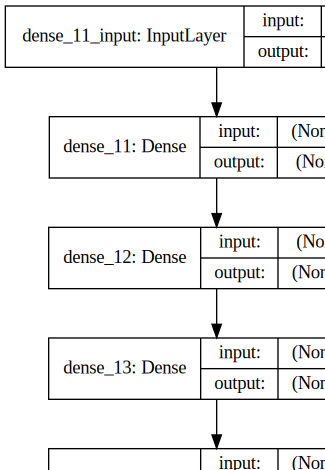

In [96]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:

history = model.fit(X_train.values, y_train, 
                    validation_data=(X_test.values, y_test), 
                    epochs=5, 
                    batch_size=32, 
                    verbose=0)

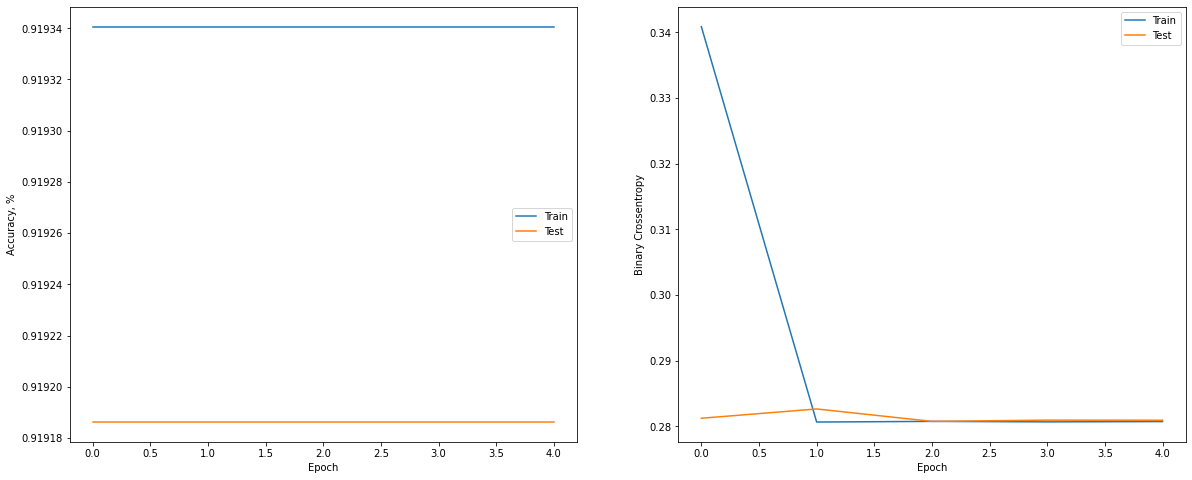

In [101]:
plt.figure(figsize=(20, 8))
# summarize history for accuracy
plt.subplot(121)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.ylabel("Accuracy, %")
plt.xlabel("Epoch")
plt.legend()
# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.ylabel('Binary Crossentropy')
plt.xlabel("Epoch")
plt.legend();

In [106]:
print(history.history['accuracy'])

[0.9193406, 0.9193406, 0.9193406, 0.9193406, 0.9193406]


In [0]:
preds_test = model.predict_classes(X_test.values, verbose=0)

preds_train = model.predict_classes(X_train.values, verbose=0)

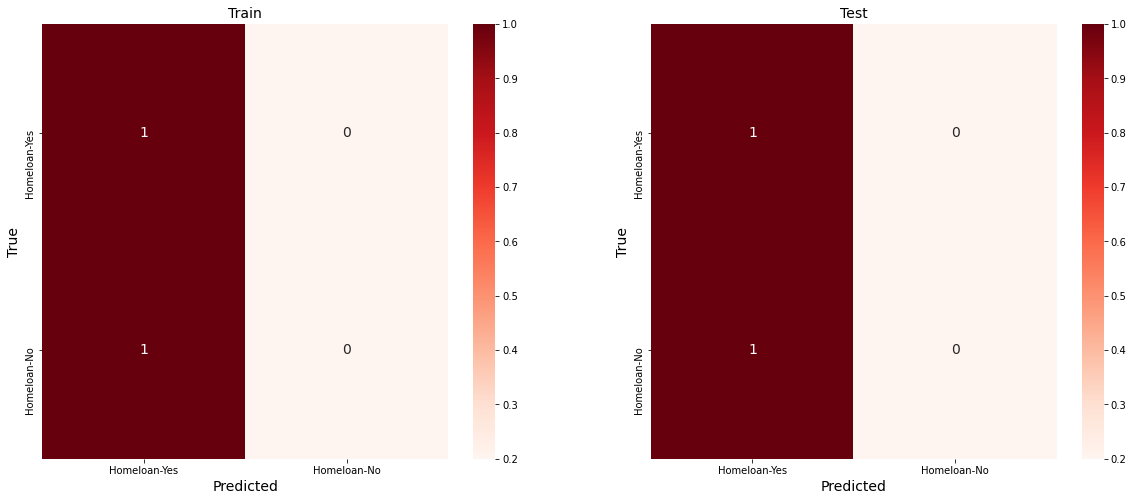

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)
## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material
## Discussion
Discuss  & analyze your different experimental results  

Please include code sections when necessary as well as images or any relevant material
## Conclusion
## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.layers import Dense, Input
from keras.models import Model
from keras.utils.vis_utils import model_to_dot

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import SVG, display

Using TensorFlow backend.


In [0]:
metrics = [mean_absolute_error, 
           lambda y_true, y_pred: mean_squared_error(y_true, y_pred) ** 0.5, 
           mean_absolute_percentage_error]
metrics_names = ["MAE", 
                 "RMSE", 
                 "MAPE"]

In [0]:
def evaluate(models, metrics, samples, metrics_names, models_names):
    results = np.zeros((len(samples) * len(models), len(metrics)))
    samples_names = []
    for m in models_names:
        samples_names.extend([m + " Train", m + " Test"])
    for m_num, model in enumerate(models):
        for row, sample in enumerate(samples):
            for col, metric in enumerate(metrics):
                results[row + m_num * 2, col] = metric(sample[1], model.predict(sample[0]))
    results = pd.DataFrame(results, columns=metrics_names, index=samples_names)
    return results

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(1, input_dim=57)) #identity activation function, i.e., no  activation='softmax'))
model.add(Activation('relu'))
inp = Input(shape=(57,))
out = Dense(1)(inp)
model = Model(inputs=[inp], outputs=[out])
model.compile(loss="mse", optimizer="adam", metrics=["mae"])


X_train = dfi_train[sel_num_feat_intgrtd]
y_train = dfi_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.90, random_state=42)


hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, verbose=0)

{'val_loss': [nan], 'val_mae': [nan], 'loss': [nan], 'mae': [nan]}


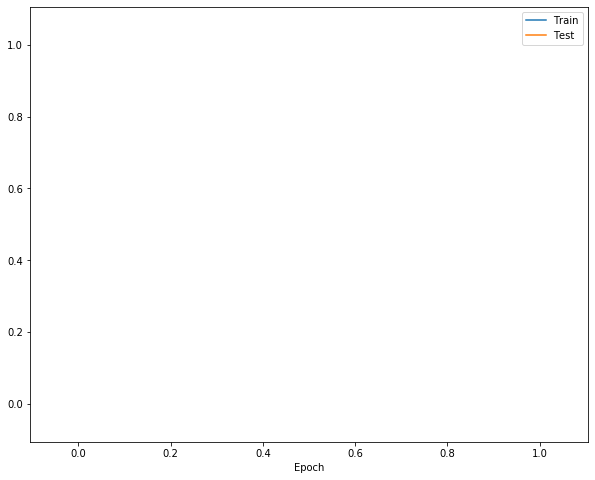

In [0]:
print(hist.history)

plt.figure(figsize=(10, 8))
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_mae"], label="Test")
plt.legend(frameon=True)
plt.xlabel("Epoch");

In [0]:
# Rough Notes

In [0]:
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    from sklearn.ensemble import RandomForestClassifier
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('LGBM', LGBMClassifier())
        #('Naive Bayes', GaussianNB()),
        #('Support Vector', SVC(random_state=42)),
        #('Stochastic GD', SGDClassifier(random_state=42)),
        #('RandomForest', RandomForestClassifier()),
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ['l1', 'l2'],
            'tol': [0.0001, 0.00001, 0.0000001], 
            'C': [1, 0.1, 0.01]
        },
         'lgbm_params' : {"learning_rate": [0.001, 0.01, 0.1],
                          "n_estimators": [200, 500, 100], 
                          "max_depth":[1,2,35,8]}
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessor),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params_grid, cv=10, iid=False)
        grid_search.fit(X_train, y_train)
        print(("best logistic regression from grid search: %.3f"       % grid_search.score(X_test, y_test)))
        model = grid_search
        #grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=5, verbose=1)
        #grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train, y_train, cv=cv30Splits)
        best_train_accuracy = pct(np.mean(best_train_scores))      
       
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]
        results.loc

In [0]:



full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessor),
        ("predictor", lgbm)
        ])

full_pipeline_with_predictor.fit(X_train, y_train)
print("model score: %.3f" % full_pipeline_with_predictor.score(X_test, y_test))
lgbm = LGBMClassifier() 
lgbm_params = {"predictor__learning_rate": [np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)],  "predictor__n_estimators": [200, 500, 100],  "predictor__max_depth":[1,2,35,8]} 
full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessor),
        ("predictor", lgbm),
        ("predictor__n_estimators":)
        ])
print(full_pipeline_with_predictor.get_params().keys())
lgbm_cv_model = GridSearchCV(full_pipeline_with_predictor,lgbm_params, cv = 10, n_jobs = -1).fit(X_train, y_train) 
lgbm_cv_model.best_params_### GRID SEARCH - LATEST 


param_grid = {   'num_leaves': [31, 127],    'reg_alpha': [0.1, 0.5],    'min_data_in_leaf': [30, 50, 100, 300, 400],   'lambda_l1': [0, 1, 1.5],    'lambda_l2': [0, 1]   }
lgb_estimator = LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc',categorical_feature=['WEEKDAY_APPR_PROCESS_START','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=5)
lgb_model = gsearch.fit(X_train, y_train)
print(lgb_model.best_params_, lgb_model.best_score_)






######### RANDOM FOREST PARAMS : 
,
        'RandomForest':  {
            'max_depth': [9, 15, 22, 26, 30],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[20, 80, 150, 200, 300]},